<a href="https://colab.research.google.com/github/stepheodhiambo2000/BUSINESS-ANALYST/blob/main/linearregression_usedcarprice_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/car_data_v2.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(10)

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000
5,Maruti Alto,Maruti,Alto,8,25000,20.92,67.10,5,230000
6,Renault KWID,Renault,KWID,4,30000,23.01,67.00,5,340000
7,Maruti Wagon R,Maruti,Wagon R,2,10000,20.51,67.04,5,445000
8,Maruti Wagon R,Maruti,Wagon R,3,53237,26.60,58.16,5,410000
9,Datsun RediGO,Datsun,RediGO,3,27263,22.50,68.00,5,350000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


In [ ]:
df.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2.119000e+03
mean,6.153374,42207.621992,22.574856,61.802931,5.002832,3.287744e+05
std,3.524845,27950.561196,3.008683,13.112960,0.176503,1.496699e+05
min,0.000000,581.000000,14.400000,38.400000,4.000000,4.000000e+04
25%,4.000000,21000.000000,20.510000,53.260000,5.000000,2.490000e+05
50%,5.000000,38000.000000,22.740000,67.000000,5.000000,3.150000e+05
75%,8.000000,58494.000000,23.950000,67.050000,5.000000,3.900000e+05
max,29.000000,425785.000000,33.540000,123.370000,7.000000,1.240000e+06


In [ ]:
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
mileage,0
max_power,0
seats,0
selling_price,0


In [ ]:
df.model.value_counts()

,count
model,
Alto,776
Wagon R,613
KWID,306
Celerio,237
RediGO,75
Venue,39
Polo,17
Ecosport,14
S-Presso,13


In [ ]:
df.shape

(2119, 9)

In [ ]:

df_num = df.select_dtypes(exclude = 'O')
df_num.corr()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
vehicle_age,1.000000,0.518790,-0.335906,-0.247142,-0.056857,-0.651667
km_driven,0.518790,1.000000,-0.054041,-0.154716,-0.068281,-0.398813
mileage,-0.335906,-0.054041,1.000000,-0.289371,-0.224627,-0.014413
max_power,-0.247142,-0.154716,-0.289371,1.000000,0.112602,0.718961
seats,-0.056857,-0.068281,-0.224627,0.112602,1.000000,0.146811
selling_price,-0.651667,-0.398813,-0.014413,0.718961,0.146811,1.000000


<Axes: >

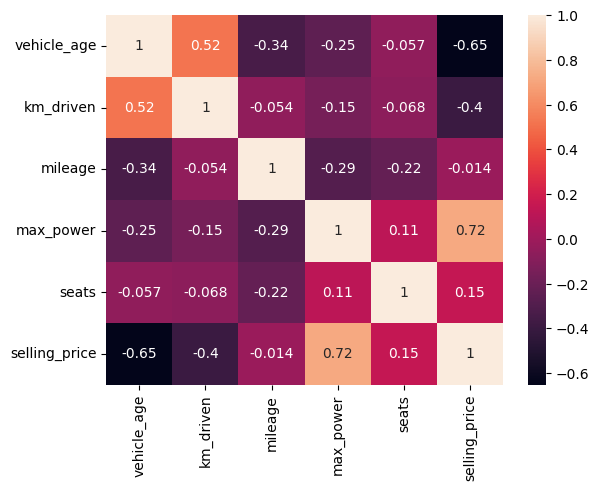

In [ ]:
sns.heatmap(df_num.corr(),annot=True)

In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_num.drop('selling_price', axis=1)
y = df_num['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5384168302.189596
Root Mean Squared Error: 73376.89215406711
R-squared: 0.7038973269105109
